In [17]:
import sqlite3
import matplotlib.pyplot as plt
conn = sqlite3.connect('Formula1.sqlite')
cursor = conn.cursor()


In [18]:
cursor.execute("SELECT raceId, name, year FROM Races WHERE year = 2008")
races_2008 = cursor.fetchall()
print("2008 Races:", races_2008)

2008 Races: [(18, 'Australian Grand Prix', 2008), (19, 'Malaysian Grand Prix', 2008), (20, 'Bahrain Grand Prix', 2008), (21, 'Spanish Grand Prix', 2008), (22, 'Turkish Grand Prix', 2008), (23, 'Monaco Grand Prix', 2008), (24, 'Canadian Grand Prix', 2008), (25, 'French Grand Prix', 2008), (26, 'British Grand Prix', 2008), (27, 'German Grand Prix', 2008), (28, 'Hungarian Grand Prix', 2008), (29, 'European Grand Prix', 2008), (30, 'Belgian Grand Prix', 2008), (31, 'Italian Grand Prix', 2008), (32, 'Singapore Grand Prix', 2008), (33, 'Japanese Grand Prix', 2008), (34, 'Chinese Grand Prix', 2008), (35, 'Brazilian Grand Prix', 2008)]


driver_name = input("Driver Name: ")
nationality = input("Nationality: ")
cursor.execute(
    "INSERT INTO Drivers (forename, surname, nationality) VALUES (?, ?, ?)",
    (driver_name.split()[0], " ".join(driver_name.split()[1:]), nationality)
)
conn.commit()
print(f"Inserted driver: {driver_name}, {nationality}")

In [19]:
driver_id_to_update = int(input("Driver ID to update: "))
new_nationality = input("New Nationality: ")
cursor.execute(
    "UPDATE Drivers SET nationality = ? WHERE driverId = ?",
    (new_nationality, driver_id_to_update)
)
conn.commit()
print(f"Updated driver ID {driver_id_to_update} to nationality {new_nationality}")


Driver ID to update:  6
New Nationality:  მალტა


Updated driver ID 6 to nationality მალტა


In [20]:
cursor.execute("DELETE FROM Drivers WHERE forename = ? AND surname = ?", ("Test", "Driver"))
conn.commit()
print("Deleted drivers named 'Test Driver'")


Deleted drivers named 'Test Driver'


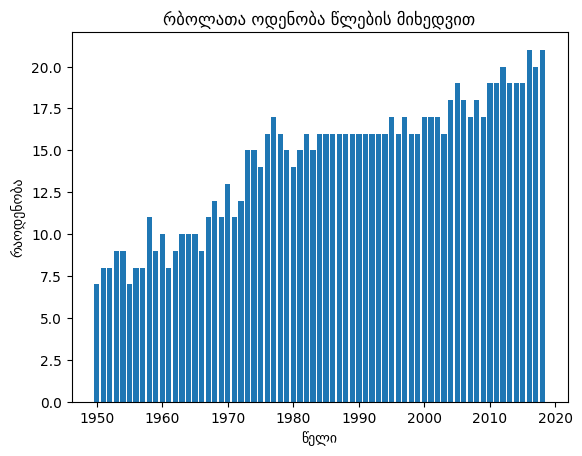

In [22]:
cursor.execute("SELECT year, COUNT(*) FROM Races GROUP BY year")
data = cursor.fetchall()
years = [row[0] for row in data]
counts= [row[1] for row in data]
plt.figure()
plt.bar(years, counts)
plt.xlabel("წელი")
plt.ylabel("რაოდენობა")
plt.title("რბოლათა ოდენობა წლების მიხედვით")
plt.show()
#ცხადია, ყოველ წელს იგივე რაოდენობის რბოლები არ იმართებოდა. აქ ჩანს თუ როგორ იმატებს წლების განმავლობაში რბოლათა რაოდენობა

In [23]:
conn.close()
